## Python script to find buckling load, basic type 4

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding on this page!

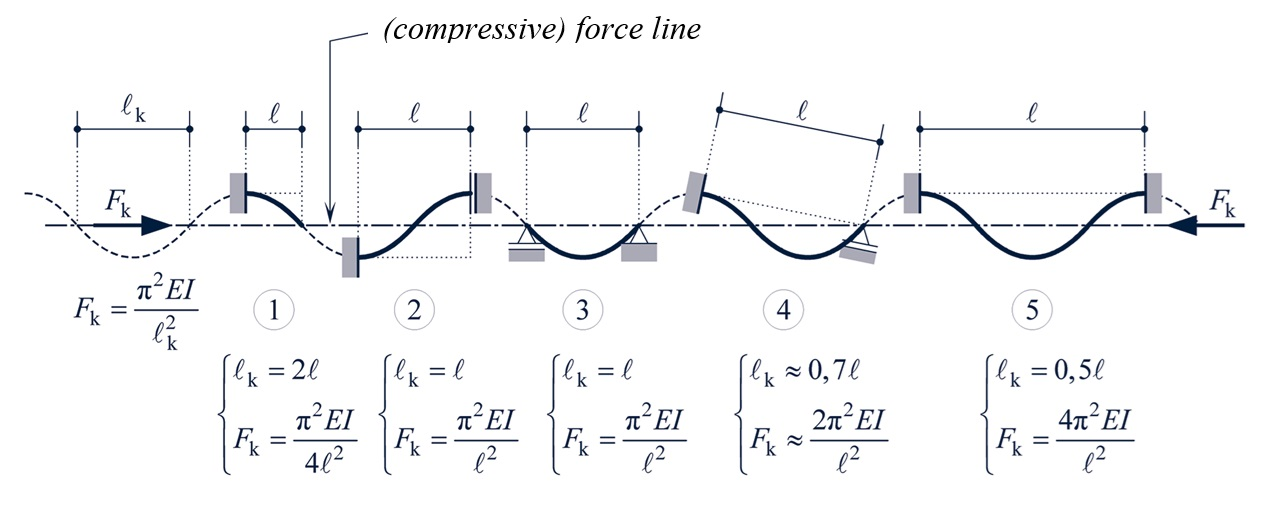

(c) 2024 : Hans Welleman

**Given**:

- Cross-section $A$
- Bending stiffness $EI$
- Constant compressive force $F$
- Length $L$

Flexural Buckling for an Euler-Bernoulli model:

$$ EI \cfrac{d^4w\left(x\right)}{dx^4} + F \cfrac{d^2w\left(x\right)}{dx^2} = 0$$

**Question**:
Find the lowest four buckling loads and corresponding buckling modes.

In [1]:
import numpy as np
import sympy as sym
import scipy.optimize as so
from sympy.plotting import plot
# --------------------------------------------------------------------
# NOTE: check
#       - sympy is up to date
#       - matplotlib is up to date
#       - scipy is up to date (pip install scipy)
#       - install ipympl (e.g. pip install ipywidgets==8.0.4)
#
# units kN, m
#
# 2024 (c) Hans Welleman
# --------------------------------------------------------------------
W   = sym.symbols('W', cls=sym.Function)
C1, C2, C3, C4 = sym.symbols('C1 C2 C3 C4')
x, F= sym.symbols('x F', real=True, positive=True)
EI, rho, beta, A, L, omega = sym.symbols('EI rho beta A L omega',real=True, positive=True)

## ODE-solution

In [2]:
# ODE per field:
DV = sym.Eq(W(x).diff(x,4)+(beta**2)*W(x),0)
W  = sym.dsolve(DV,W(x))
# display(W)
W = W.rhs
# general solution:
# display(W)
# or specify the general solution to improve readability:
W = C1+C2*x+C3*sym.cos(beta*x)+C4*sym.sin(beta*x)
display(W)

C1 + C2*x + C3*cos(beta*x) + C4*sin(beta*x)

In [3]:
# needed derivatives for BC or IC:
phi   = -sym.diff(W , x)
kappa =  sym.diff(phi , x)
M     = EI * kappa
Sz    =  sym.diff(M , x)-F*sym.diff(W, x)

In [4]:
# Boundary and/or Interface Conditions - system of equations -
# type 4 buckling (see picture at the top)
eq1  = sym.Eq(  W.subs(x , 0) , 0)
eq2  = sym.Eq(  phi.subs(x , 0) , 0)
eq3 = sym.Eq(W.subs(x , L) , 0)
eq4 = sym.Eq(   M.subs(x , L) , 0)
display(eq1, eq2, eq3, eq4)


Eq(C1 + C3, 0)

Eq(-C2 - C4*beta, 0)

Eq(C1 + C2*L + C3*cos(L*beta) + C4*sin(L*beta), 0)

Eq(EI*(C3*beta**2*cos(L*beta) + C4*beta**2*sin(L*beta)), 0)

In [5]:
# create matrix notation and find determinant:
A, b = sym.linear_eq_to_matrix((eq1 , eq2 , eq3 , eq4) ,
               (C1  , C2  , C3  , C4))
display(A)
display(b)
# simplify char. equation
kar_vgl = sym.simplify( A.det()) / (EI*beta**2)
display(kar_vgl)

Matrix([
[1,  0,                      1,                      0],
[0, -1,                      0,                  -beta],
[1,  L,            cos(L*beta),            sin(L*beta)],
[0,  0, EI*beta**2*cos(L*beta), EI*beta**2*sin(L*beta)]])

Matrix([
[0],
[0],
[0],
[0]])

-L*beta*cos(L*beta) + sin(L*beta)

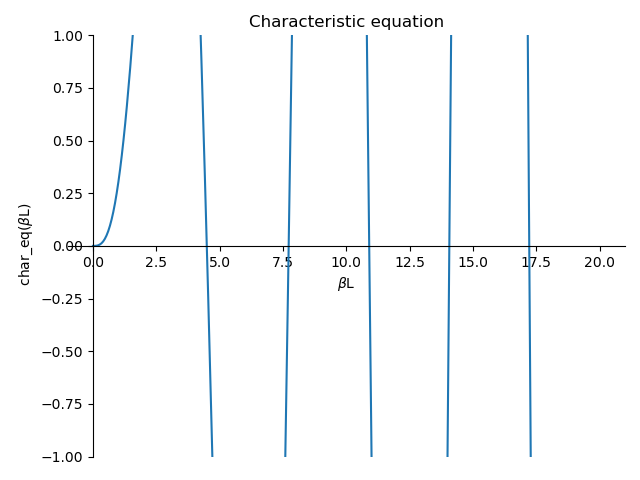

In [6]:
Lval = 1
# find first four roots
# plot characteristic equations:
%matplotlib widget
AA = kar_vgl.subs(L,Lval),(beta,0,20)
plot(AA,title='Characteristic equation',ylim=[-1,1],xlabel=r'$\beta$L',ylabel=r' char_eq($\beta$L)',adaptive=False);

## Buckling loads

In [7]:
# Find roots of the characteristic equation (=buckling load)
print("determinant:");
display(kar_vgl)
f = sym.lambdify(beta, kar_vgl.subs(L,Lval))
# numerical solution with 4 start values:
sol = so.fsolve(f,[6,9,11,13])
x1 = sol[0]
x2 = sol[1]
x3 = sol[2]
x4 = sol[3]
print('\N{greek small letter beta}L1, \N{greek small letter beta}L2, \N{greek small letter beta}L3, \N{greek small letter beta}L4')
print(x1, x2, x3, x4)

determinant:


-L*beta*cos(L*beta) + sin(L*beta)

βL1, βL2, βL3, βL4
4.493409458125617 7.7252518370774395 10.9041216594289 14.066193912857397


## Buckling modes

In [8]:
# vind verhouding van C1, C2 en C4 t.o.v. C3
sol = sym.solve((eq1,eq2,eq3) ,(C1  , C2  , C4))
# display(sol)
# substitueer deze in W en schaal C3 op (1/2)*sqrt(2)
MyMode=W.subs(sol).subs(C3,sym.sqrt(2)/2)
# vul de gevonden beta*L per eigentrilling in:
w1=MyMode.subs(beta,x1/L).subs(L,1),(x,0,1)
w2=MyMode.subs(beta,x2/L).subs(L,1),(x,0,1)
w3=MyMode.subs(beta,x3/L).subs(L,1),(x,0,1)
w4=MyMode.subs(beta,x4/L).subs(L,1),(x,0,1)

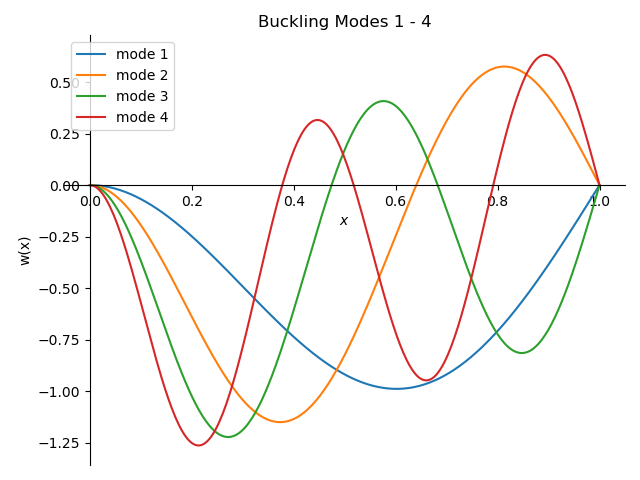

In [9]:
# plot the buckling modes:
p=plot(w1,w2,w3,w4,title='Buckling Modes 1 - 4',ylabel='w(x)',legend=True,adaptive=False, show=False);
p[0].label='mode 1' 
p[1].label='mode 2'
p[2].label='mode 3'
p[3].label='mode 4'
p.show()